# 프로젝트 개요

[ 파일명 수정 ]
- 조(학번_이름, 학번_이름)_주제명.ipynb

[ 팀원 ]
- 팀원 1 학번 : 20511
- 팀원 1 이름 : 박희찬
- 팀원 2 학번 : 20514
- 팀원 2 이름 : 여준혁
 
[ 주제 ]
- 프로젝트 주제 : 인스타 사용자의 피드와전체 피트의 좋아요, 댓글의 총합을 사용해서 팔로우 수 예측하기

[ 유의사항 ]
- 각 단계마다 Markdown과 Code를 최대한 구체적으로 작성할 것
- 아래의 양식은 가이드라인일 뿐, 머신러닝 과정의 6단계와 필수 조건이 모두 존재한다면 양식 및 순서 등을 자유롭게 수정하여 작성 가능함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hello World")

Hello World


# 1. 문제 정의 

[ 내용 ]
- 프로젝트 주제를 구체적으로 설명 (주제 / 선정 이유 / 계획 등)


[ 문제 정의 ]
- 주제 (# 필수 조건) : 인스타그램 사용자의 전체 좋아요 수, 댓글 수를 가지고 팔로우 수를 예측한다.
- 선정 이유 (# 필수 조건) : 
- 계획 : 
- 

# 2. 데이터 수집

[ 내용 ]
- 프로젝트 진행을 위해 필요한 데이터 수집
- 사이킷런에 내장되어 있는 학습용 데이터 사용 금지
- 수집한 데이터의 소스(사이트 및 링크) 반드시 기재 

[ 데이터 수집 ]
- 데이터 파일명 (# 필수 조건) : 
- 데이터 소스 (# 필수 조건) : 
- 

In [23]:
user_data = pd.read_csv("user_info.csv")

user_data

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount,commentUserList
0,0,0.0,0.0,0.0,instagram,7164,520000000,130,12,5431000,133069,"['behzad.tabesh', 'zakaria._original', 'sachin..."
1,1,1.0,1.0,0.0,behzad.tabesh,25,11400,94,24,173187,8057,"['hayedeh_hadi', 'mahsa.banaie', 'abbasazordeh..."
2,2,2.0,2.0,0.0,zakaria._original,23,13500,2486,23,33528,11229,"['y4seen_1992', 'hasel.darkaleh', 'shoeib_dark..."
3,3,3.0,3.0,0.0,sachin_kaintura_143,7,951,61,7,720,66,"['its_dipanshu_12', 'ajay.ajayrawat.5602', 'ko..."
4,4,4.0,4.0,0.0,qwasiblay,12,11700,1558,12,21760,643,"['saralopez9190', 'fre_ma.x', 'kwesikendrickk'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,NaN,NaN,NaN,hsy_sye0n,29,1924,384,12,34133,250,"['erikameliia', '___harimu___', 'iamsarisong',..."
330,0,NaN,NaN,NaN,syeonn_b,98,4207,478,12,135563,328,"['minjik__', 'clovdtea', 'stare._.ing', 'j_t.0..."
331,0,NaN,NaN,NaN,gurtn1229,25,187,175,12,2307,96,"['dayanna4u', 'jo_sung_woo46', '57xj_', 'perfe..."
332,0,NaN,NaN,NaN,loveran725,949,32000,483,12,34406,325,"['mysosoft.nina', 'loveve_1224', 'ok4kaa', 'ai..."


# 3. 데이터 전처리

[ 내용 ]
- 데이터 분석 및 모델 학습을 위한 구조로 데이터를 가공하거나 변형
- 기본적으로 코드(판다스 및 넘파이 라이브러리 등 활용)를 통해 전처리 작업을 수행해야 하지만, 힘들 경우 데이터 파일 자체를 수정하여 전처리하여도 됨
- (# 필수 조건 : 위의 경우, 수행해야 하는 전처리 작업과 수행하지 못한 이유를 작성해야 함)
- 모든 전처리 작업이 수행된 최종 데이터를 명시해야 함

[ 데이터 전처리 ]
- 필요한 전처리 작업
  - 쓰레기 열 삭제 (Unnamed: 0,	Unnamed: 0.1,	Unnamed: 0.1.1, commentUserList)
  - 중복된 유저의 데이터는 마지막 행으로 사용
- 전처리 결과 : 
- 

### 각 칼럼 설명

 - userid : 사용자 id
 - postCount : 전체 게시물 수
 - followerCount : 팔로우 수
 - folloingCount : 팔로우 한 사람 수
 - pidCount : 조사한 게시물 수
 - likeCount : 조사한 게시물의 전체 좋아요의 총합
 - commentCount : 조사한 게시물의 댓글의 총합
 - 그 외 : 필요없는 데이터

In [24]:
user_data.drop(["Unnamed: 0.3", "Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "commentUserList"], axis=1, inplace=True)

user_data

,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount
0,instagram,7164,520000000,130,12,5431000,133069
1,behzad.tabesh,25,11400,94,24,173187,8057
2,zakaria._original,23,13500,2486,23,33528,11229
3,sachin_kaintura_143,7,951,61,7,720,66
4,qwasiblay,12,11700,1558,12,21760,643
...,...,...,...,...,...,...,...
329,hsy_sye0n,29,1924,384,12,34133,250
330,syeonn_b,98,4207,478,12,135563,328
331,gurtn1229,25,187,175,12,2307,96
332,loveran725,949,32000,483,12,34406,325


In [25]:
print(f"중복 사용자 데이터의 개수 : {user_data.duplicated(subset=['userid'], keep=False).sum()}개")

user_data_dupli = user_data[user_data.duplicated(subset=['userid'], keep=False)]

user_data_dupli

중복 사용자 데이터의 개수 : 36개


,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount
66,ckstmznf,5,135,305,5,176,15
69,junsang_97,8,172,145,8,1439,27
70,chamchi_0809,16,155,202,16,768,43
72,tony_sung_ch,120,728,1885,24,3456,101
73,walk_the_chiken,8,291,606,8,3092,168
74,thanan_rucksakulchote_,398,946,1589,24,6625,383
75,giove_hun,5,144,175,5,202,13
76,jeyoun_00,14,110,87,14,1086,32
77,luminare_31,5,43,70,5,87,5
78,leviyoyos,28,718,338,24,9194,438


In [26]:
pd.DataFrame(user_data_dupli.groupby(by="userid")["userid"].count())

,userid
userid,
_cupmen,2
c_student_zeff,2
chamchi_0809,2
ckstmznf,2
cuzbriwantsto,2
giove_hun,2
i_swizzle,2
jeyoun_00,2
junsang_97,2


In [27]:
user_data = user_data.drop_duplicates(["userid"], keep="last")

user_data

,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount
0,instagram,7164,520000000,130,12,5431000,133069
1,behzad.tabesh,25,11400,94,24,173187,8057
2,zakaria._original,23,13500,2486,23,33528,11229
3,sachin_kaintura_143,7,951,61,7,720,66
4,qwasiblay,12,11700,1558,12,21760,643
...,...,...,...,...,...,...,...
329,hsy_sye0n,29,1924,384,12,34133,250
330,syeonn_b,98,4207,478,12,135563,328
331,gurtn1229,25,187,175,12,2307,96
332,loveran725,949,32000,483,12,34406,325


In [28]:
print(f"중복 사용자 데이터의 개수 : {user_data.duplicated(subset=['userid'], keep=False).sum()}개")

user_data_dupli = user_data[user_data.duplicated(subset=['userid'], keep=False)]

user_data_dupli

중복 사용자 데이터의 개수 : 0개


,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount


In [29]:
user_data.isna().sum()

userid           0
postCount        0
followerCount    0
folloingCount    0
pidCount         0
likeCount        0
commentCount     0
dtype: int64

In [30]:
user_data.drop(user_data[user_data["userid"] == "instagram"].index, inplace=True)

user_data

C:\Users\heechan\AppData\Local\Temp\ipykernel_10664\109092920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data.drop(user_data[user_data["userid"] == "instagram"].index, inplace=True)


,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount
1,behzad.tabesh,25,11400,94,24,173187,8057
2,zakaria._original,23,13500,2486,23,33528,11229
3,sachin_kaintura_143,7,951,61,7,720,66
4,qwasiblay,12,11700,1558,12,21760,643
5,roshangoswami_07,68,36400,4993,24,5080,281
...,...,...,...,...,...,...,...
329,hsy_sye0n,29,1924,384,12,34133,250
330,syeonn_b,98,4207,478,12,135563,328
331,gurtn1229,25,187,175,12,2307,96
332,loveran725,949,32000,483,12,34406,325


In [34]:
user_data["likeCountAvg"] = user_data["likeCount"] / user_data["pidCount"]

user_data

C:\Users\heechan\AppData\Local\Temp\ipykernel_10664\1858097648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data["likeCountAvg"] = user_data["likeCount"] / user_data["pidCount"]


,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount,likeCountAvg
1,behzad.tabesh,25,11400,94,24,173187,8057,7216.125000
2,zakaria._original,23,13500,2486,23,33528,11229,1457.739130
3,sachin_kaintura_143,7,951,61,7,720,66,102.857143
4,qwasiblay,12,11700,1558,12,21760,643,1813.333333
5,roshangoswami_07,68,36400,4993,24,5080,281,211.666667
...,...,...,...,...,...,...,...,...
329,hsy_sye0n,29,1924,384,12,34133,250,2844.416667
330,syeonn_b,98,4207,478,12,135563,328,11296.916667
331,gurtn1229,25,187,175,12,2307,96,192.250000
332,loveran725,949,32000,483,12,34406,325,2867.166667


In [35]:
user_data["commentCountAvg"] = user_data["commentCount"] / user_data["pidCount"]

user_data

C:\Users\heechan\AppData\Local\Temp\ipykernel_10664\2701759619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data["commentCountAvg"] = user_data["commentCount"] / user_data["pidCount"]


,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount,likeCountAvg,commentCountAvg
1,behzad.tabesh,25,11400,94,24,173187,8057,7216.125000,335.708333
2,zakaria._original,23,13500,2486,23,33528,11229,1457.739130,488.217391
3,sachin_kaintura_143,7,951,61,7,720,66,102.857143,9.428571
4,qwasiblay,12,11700,1558,12,21760,643,1813.333333,53.583333
5,roshangoswami_07,68,36400,4993,24,5080,281,211.666667,11.708333
...,...,...,...,...,...,...,...,...,...
329,hsy_sye0n,29,1924,384,12,34133,250,2844.416667,20.833333
330,syeonn_b,98,4207,478,12,135563,328,11296.916667,27.333333
331,gurtn1229,25,187,175,12,2307,96,192.250000,8.000000
332,loveran725,949,32000,483,12,34406,325,2867.166667,27.083333


# 4. 데이터 분석

[ 내용 ]
- 수집한 데이터의 탐색 및 분석을 진행
- 반드시 하나 이상의 그래프(맷플롯립 라이브러리 등 활용)를 활용해야 함 (# 필수 조건)
- 매 데이터 분석의 결과를 명시해야 함 (# 필수 조건)

[ 데이터 분석 ]
- 분석 내용 : 
- 분석 결과 : 
- 

In [41]:
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

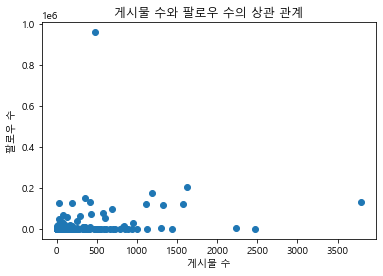

In [65]:
plt.scatter(user_data["postCount"], user_data["followerCount"])

plt.title("게시물 수와 팔로우 수의 상관 관계")

plt.xlabel("게시물 수")
plt.ylabel("팔로우 수")

plt.show()

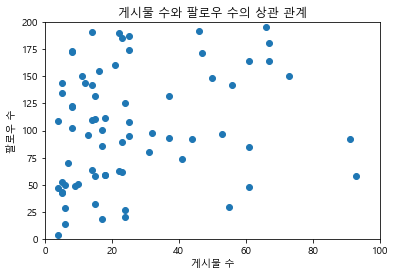

In [66]:
plt.scatter(user_data["postCount"], user_data["followerCount"])

plt.title("게시물 수와 팔로우 수의 상관 관계")

plt.xlabel("게시물 수")
plt.ylabel("팔로우 수")

plt.axis([0, 100, 0, 200])

plt.show()

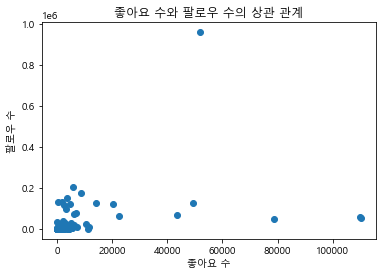

In [67]:
plt.scatter(user_data["likeCountAvg"], user_data["followerCount"])

plt.title("좋아요 수와 팔로우 수의 상관 관계")

plt.xlabel("좋아요 수")
plt.ylabel("팔로우 수")

plt.show()

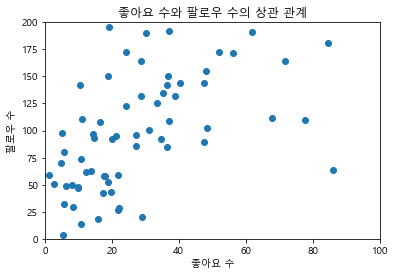

In [68]:
plt.scatter(user_data["likeCountAvg"], user_data["followerCount"])

plt.title("좋아요 수와 팔로우 수의 상관 관계")

plt.xlabel("좋아요 수")
plt.ylabel("팔로우 수")

plt.axis([0, 100, 0, 200])

plt.show()

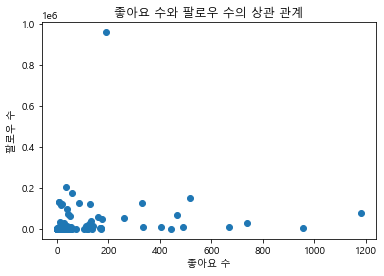

In [69]:
plt.scatter(user_data["commentCountAvg"], user_data["followerCount"])

plt.title("좋아요 수와 팔로우 수의 상관 관계")

plt.xlabel("좋아요 수")
plt.ylabel("팔로우 수")

plt.show()

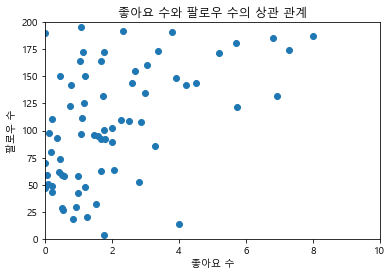

In [70]:
plt.scatter(user_data["commentCountAvg"], user_data["followerCount"])

plt.title("좋아요 수와 팔로우 수의 상관 관계")

plt.xlabel("좋아요 수")
plt.ylabel("팔로우 수")

plt.axis([0, 10, 0, 200])

plt.show()

# 5. 모델 학습

[ 내용 ] 
- 머신러닝 알고리즘(회귀 및 분류)을 사용하여 모델의 학습을 진행
- 수업시간에 배운 것 이외의 알고리즘도 사용 가능함
- (# 필수 조건 : 위의 경우, 해당 알고리즘의 원리 및 간단한 설명을 작성해야 함)
- 반드시 '훈련 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 학습 ]
- 사용한 머신러닝 알고리즘 (# 필수 조건) : 
- 해당 알고리즘의 원리 : 
- 

In [94]:
data_input = user_data[["postCount", "likeCount", "commentCount", "likeCountAvg", "commentCountAvg"]]
data_input = data_input.to_numpy()

print(data_input.shape)

data_input

(315, 5)


array([[2.50000000e+01, 1.73187000e+05, 8.05700000e+03, 7.21612500e+03,
        3.35708333e+02],
       [2.30000000e+01, 3.35280000e+04, 1.12290000e+04, 1.45773913e+03,
        4.88217391e+02],
       [7.00000000e+00, 7.20000000e+02, 6.60000000e+01, 1.02857143e+02,
        9.42857143e+00],
       ...,
       [2.50000000e+01, 2.30700000e+03, 9.60000000e+01, 1.92250000e+02,
        8.00000000e+00],
       [9.49000000e+02, 3.44060000e+04, 3.25000000e+02, 2.86716667e+03,
        2.70833333e+01],
       [1.72000000e+02, 5.49560000e+04, 2.31000000e+02, 4.57966667e+03,
        1.92500000e+01]])

In [95]:
data_target = user_data["followerCount"]
data_target = data_target.to_numpy()

print(data_target.shape)

data_target

(315,)


array([ 11400,  13500,    951,  11700,  36400,    949,  63000, 117000,
         1063,   1910,    406,  98300,   4426,  27200,  58300,  82400,
       131000,  43600,   4998,   3925,    125,    639,  10100,    277,
          733,    290,   3938,   9094,   3159,   5968,   3083,   5468,
         1803,   8009,  33500,  14400,  18100,   4136,    545,  11600,
          238,    628,    602,   4321,   4618,   1036,   8039,   1008,
         6689,   1007,   2041,  15200,    519,     80, 151000,    382,
         1528,    195,   1272,    315,   2950,    842,   1856,   1972,
          483,    123,    111,    339,    700,    428,   1026,  14600,
          122,    185,    888,    920,   1412,    440,   3884,    402,
         4307,   1358, 130000,   1405,   4713,    434,    284,    439,
          506,    646,    236,  14200,   4586,    574,   1335,    786,
          863,    559,    102,    164,    132,     62,    474,    610,
          172,    730,    516,    227,   1404,    164,    174,   3343,
      

In [96]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(data_input, data_target, test_size=0.2, random_state = 1) 


print(input_train.shape, target_train.shape)

print(input_test.shape, target_test.shape)

(252, 5) (252,)
(63, 5) (63,)


In [97]:
from sklearn.linear_model import LinearRegression

model_lnr = LinearRegression()
model_lnr.fit(input_train, target_train)

LinearRegression()

In [104]:
model_lnr.predict([[5, 176, 15, 35, 3]])

array([-2403.26723474])

In [102]:
user_data[user_data["userid"] == "ckstmznf"]

,userid,postCount,followerCount,folloingCount,pidCount,likeCount,commentCount,likeCountAvg,commentCountAvg
225,ckstmznf,5,135,305,5,176,15,35.2,3.0


In [103]:
[["postCount", "likeCount", "commentCount", "likeCountAvg", "commentCountAvg"]]

[['postCount', 'likeCount', 'commentCount', 'likeCountAvg', 'commentCountAvg']]

# 6. 모델 평가

[ 내용 ]
- 학습이 완료된 모델을 통해 값을 예측해보고, 최종적으로 모델의 성능을 평가
- 반드시 '테스트 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 평가 ]
- 성능 평가 결과 : 
- 

In [ ]:
# 모델 평가

In [105]:
model_lnr.score(input_train, target_train), model_lnr.score(input_test, target_test)

(0.35696920091788364, 0.327014124256925)

# 프로젝트 마무리

[ 결론 ]
- 진행한 프로젝트 정리

- 요약 (# 필수 조건) : 
- 의의 (# 필수 조건) : 
- 느낀점 (# 필수 조건) : 
- 